In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

In [ ]:
df.drop('index', axis = 1, inplace = True)

In [7]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
reg = LinearRegression().fit(train_X, train_y)

In [9]:
lin_reg_score = reg.score(train_X, train_y)
lin_reg_score

0.4555406785040048

In [10]:
lin_reg_mse = mean_squared_error(reg.predict(train_X), train_y)
lin_reg_mse

29840.1212508653

In [11]:
crossval = cross_validate(reg, train_X, train_y, cv=3, 
                        scoring=('neg_mean_squared_error'))

In [12]:
crossval

{'fit_time': array([0.04071283, 0.05256152, 0.04167342]),
 'score_time': array([0.01231551, 0.00456667, 0.00800037]),
 'test_score': array([-29836.8590711 , -29618.75539267, -30344.6536926 ])}

In [13]:
cross_val_mse = mean_squared_error(reg.predict(test_X), test_y)

# Data lookup

In [14]:
for column in df.columns:
    if df[column].unique().shape[0] == 1:
        print(f'col: {column}')

In [15]:
import seaborn as sns

<Axes: >

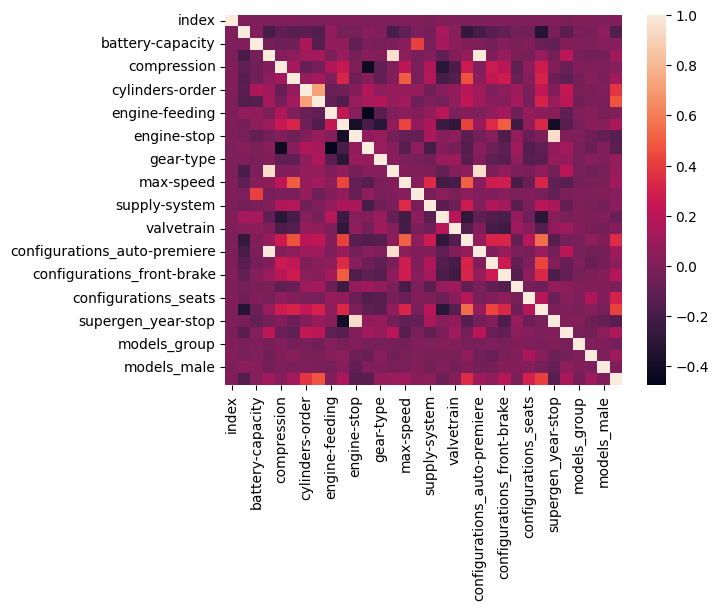

In [16]:

sns.heatmap(df.corr())

# lasso

In [17]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error as mse

In [18]:
import numpy as np

## non normalized data

In [19]:
def adjustedR2(r2, n, k):
    return r2-(k-1)/(n-k)*(1-r2)

In [20]:
alpha_ = np.round(np.linspace(1,20,40), 2)
scores_train_ = []
scores_adj_train_ = []
scores_test_ = []
scores_adj_test_ = []
mse_train_ = []
mse_test_ = []

for alpha in alpha_:
    model_lasso = lm.Lasso(alpha = alpha)
    model_lasso.fit(train_X, train_y)

    scores_train_.append(format(model_lasso.score(train_X, train_y), '.3f'))
    scores_adj_train_.append(format(adjustedR2(model_lasso.score(train_X, train_y),
                                                train_X.shape[0],
                                                train_X.shape[1])
                                            , '.3f'))
    
    scores_test_.append(format(model_lasso.score(test_X, test_y), '.3f'))
    scores_adj_test_.append(format(adjustedR2(model_lasso.score(test_X, test_y),
                                                test_X.shape[0],
                                                test_X.shape[1])
                                            , '.3f'))

    mse_train_.append(format(mse(model_lasso.predict(train_X), train_y), '.3f'))
    mse_test_.append(format(mse(model_lasso.predict(test_X), test_y), '.3f'))

In [21]:
import matplotlib.pyplot as plt

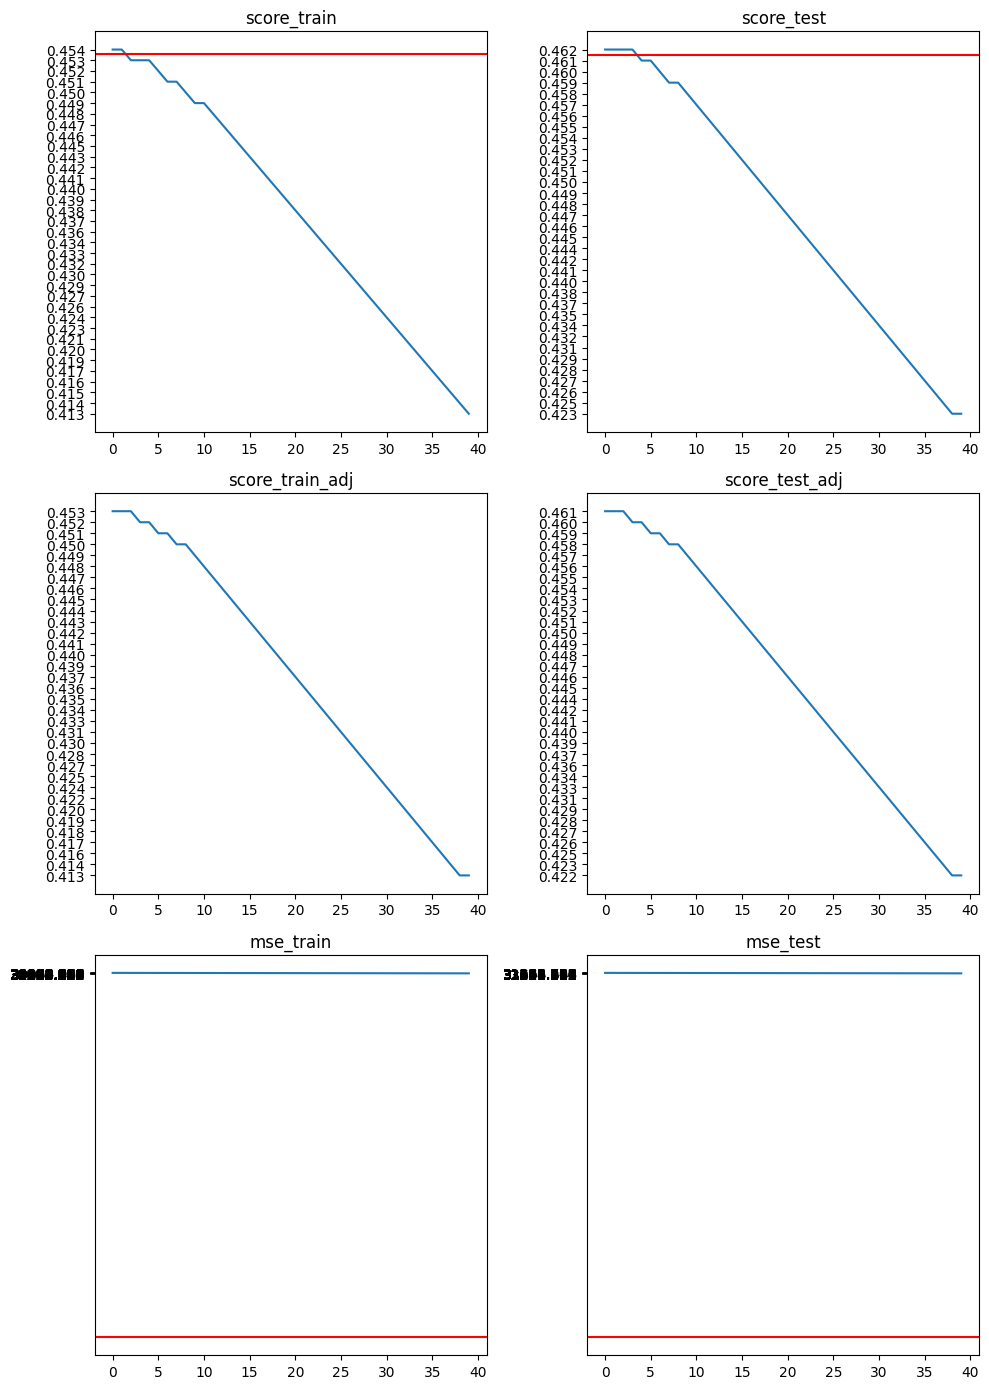

In [22]:
fig, axes = plt.subplots(3,2, figsize = (10,14))

sns.lineplot(scores_train_, ax = axes[0,0]).set(title = 'score_train')
axes[0,0].axhline(lin_reg_score, color = 'red')
sns.lineplot(scores_test_, ax = axes[0,1]).set(title = 'score_test')
axes[0,1].axhline(lin_reg_score, color = 'red')

sns.lineplot(scores_adj_train_, ax = axes[1,0]).set(title = 'score_train_adj')
sns.lineplot(scores_adj_test_, ax = axes[1,1]).set(title = 'score_test_adj')

sns.lineplot(mse_train_, ax = axes[2,0]).set(title = 'mse_train')
axes[2,0].axhline(lin_reg_mse, color = 'red')
sns.lineplot(mse_test_, ax = axes[2,1]).set(title = 'mse_test')
axes[2,1].axhline(lin_reg_mse, color = 'red')

plt.tight_layout()

## ridge

In [23]:
alpha_ = np.round(np.linspace(1, 20, 40), 2)
scores_train_ = []
scores_adj_train_ = []
scores_test_ = []
scores_adj_test_ = []
mse_train_ = []
mse_test_ = []

for alpha in alpha_:
    model_ridge = lm.Ridge(alpha = alpha)
    model_ridge.fit(train_X, train_y)

    scores_train_.append(format(model_ridge.score(train_X, train_y), '.3f'))
    scores_adj_train_.append(format(adjustedR2(model_ridge.score(train_X, train_y),
                                                train_X.shape[0],
                                                train_X.shape[1])
                                            , '.3f'))
    
    scores_test_.append(format(model_ridge.score(test_X, test_y), '.3f'))
    scores_adj_test_.append(format(adjustedR2(model_ridge.score(test_X, test_y),
                                                test_X.shape[0],
                                                test_X.shape[1])
                                            , '.3f'))

    mse_train_.append(format(mse(model_ridge.predict(train_X), train_y), '.3f'))
    mse_test_.append(format(mse(model_ridge.predict(test_X), test_y), '.3f'))

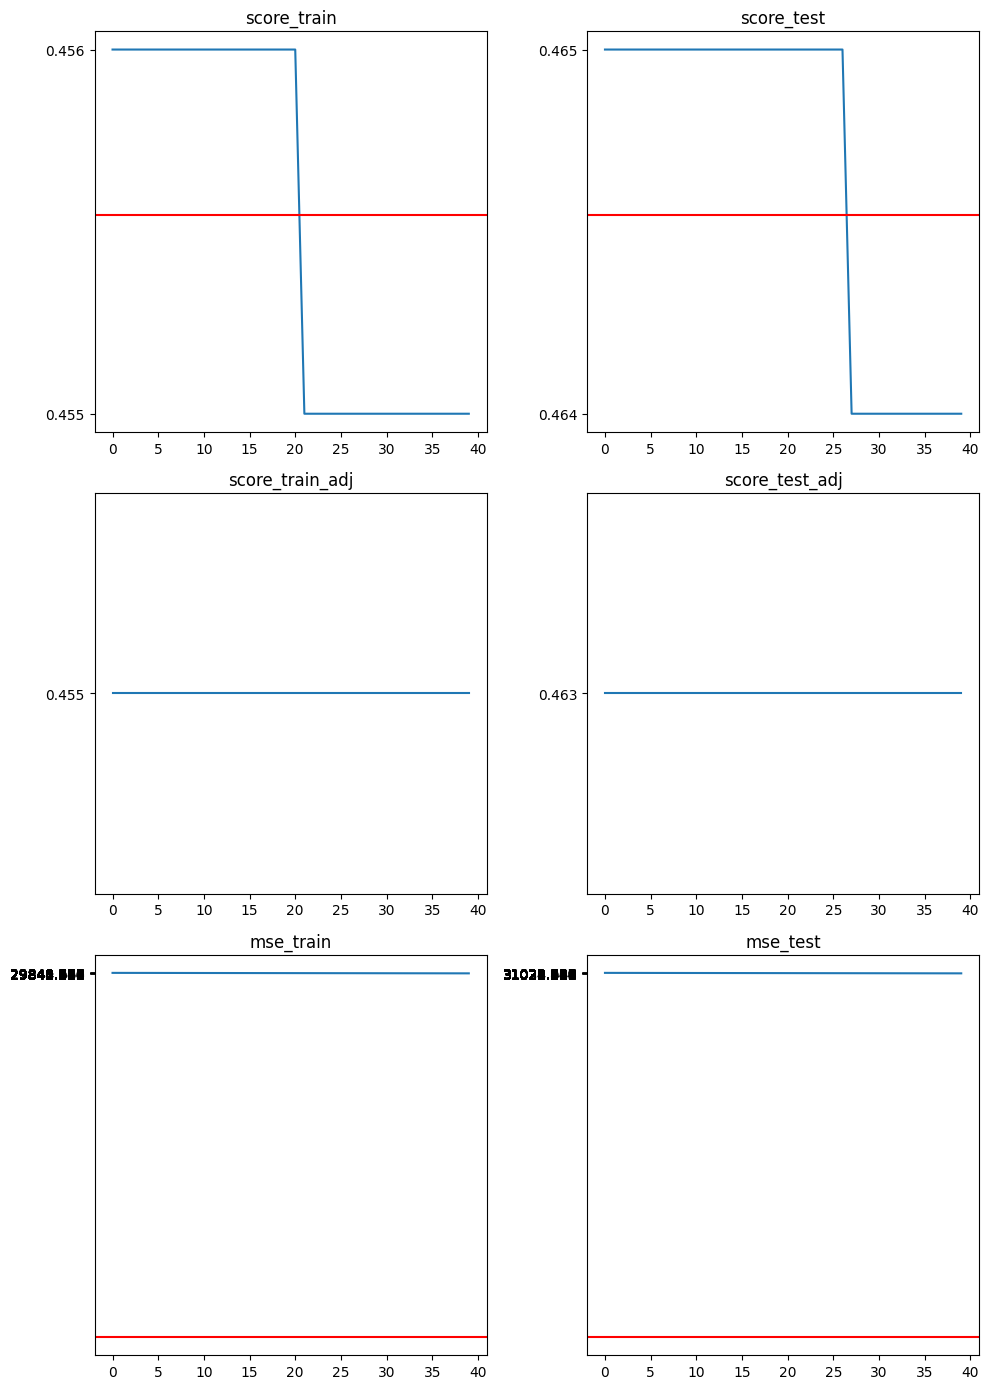

In [24]:
fig, axes = plt.subplots(3,2, figsize = (10,14))

sns.lineplot(scores_train_, ax = axes[0,0]).set(title = 'score_train')
axes[0,0].axhline(lin_reg_score, color = 'red')
sns.lineplot(scores_test_, ax = axes[0,1]).set(title = 'score_test')
axes[0,1].axhline(lin_reg_score, color = 'red')

sns.lineplot(scores_adj_train_, ax = axes[1,0]).set(title = 'score_train_adj')
sns.lineplot(scores_adj_test_, ax = axes[1,1]).set(title = 'score_test_adj')

sns.lineplot(mse_train_, ax = axes[2,0]).set(title = 'mse_train')
axes[2,0].axhline(lin_reg_mse, color = 'red')
sns.lineplot(mse_test_, ax = axes[2,1]).set(title = 'mse_test')
axes[2,1].axhline(lin_reg_mse, color = 'red')

plt.tight_layout()

Как видим, существенно большего качества не случилось.
Попробуем отнормализировать данные и посмотрим, улучшится ли качество.

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
train_X.drop('index', axis = 1, inplace = True)

In [27]:
test_X.drop('index', axis = 1, inplace = True)

In [28]:
scaler = StandardScaler()
scaler.fit(train_X.to_numpy())
train_x_norm = scaler.transform(train_X.to_numpy())

scaler = StandardScaler()
scaler.fit(test_X.to_numpy())
test_x_norm = scaler.transform(test_X.to_numpy())

scaler = StandardScaler()
scaler.fit(train_y.to_numpy())
train_y_norm = scaler.transform(train_y.to_numpy())

scaler = StandardScaler()
scaler.fit(test_y.to_numpy())
test_y_norm = scaler.transform(test_y.to_numpy())

train_y_norm = train_y
test_y_norm = test_y

In [29]:
alpha_ = np.round(np.linspace(1,20,40), 2)
scores_train_ = []
scores_adj_train_ = []
scores_test_ = []
scores_adj_test_ = []
mse_train_ = []
mse_test_ = []

for alpha in alpha_:
    model_lasso = lm.Lasso(alpha = alpha)
    model_lasso.fit(train_x_norm, train_y_norm)

    scores_train_.append(format(model_lasso.score(train_x_norm, train_y_norm), '.3f'))
    scores_adj_train_.append(format(adjustedR2(model_lasso.score(train_x_norm, train_y_norm),
                                                test_x_norm.shape[0],
                                                test_x_norm.shape[1])
                                            , '.3f'))
    
    scores_test_.append(format(model_lasso.score(test_x_norm, test_y_norm), '.3f'))
    scores_adj_test_.append(format(adjustedR2(model_lasso.score(test_x_norm, test_y_norm),
                                                test_x_norm.shape[0],
                                                test_x_norm.shape[1])
                                            , '.3f'))

    mse_train_.append(format(mse(model_lasso.predict(train_x_norm), train_y_norm), '.3f'))
    mse_test_.append(format(mse(model_lasso.predict(test_x_norm), test_y_norm), '.3f'))

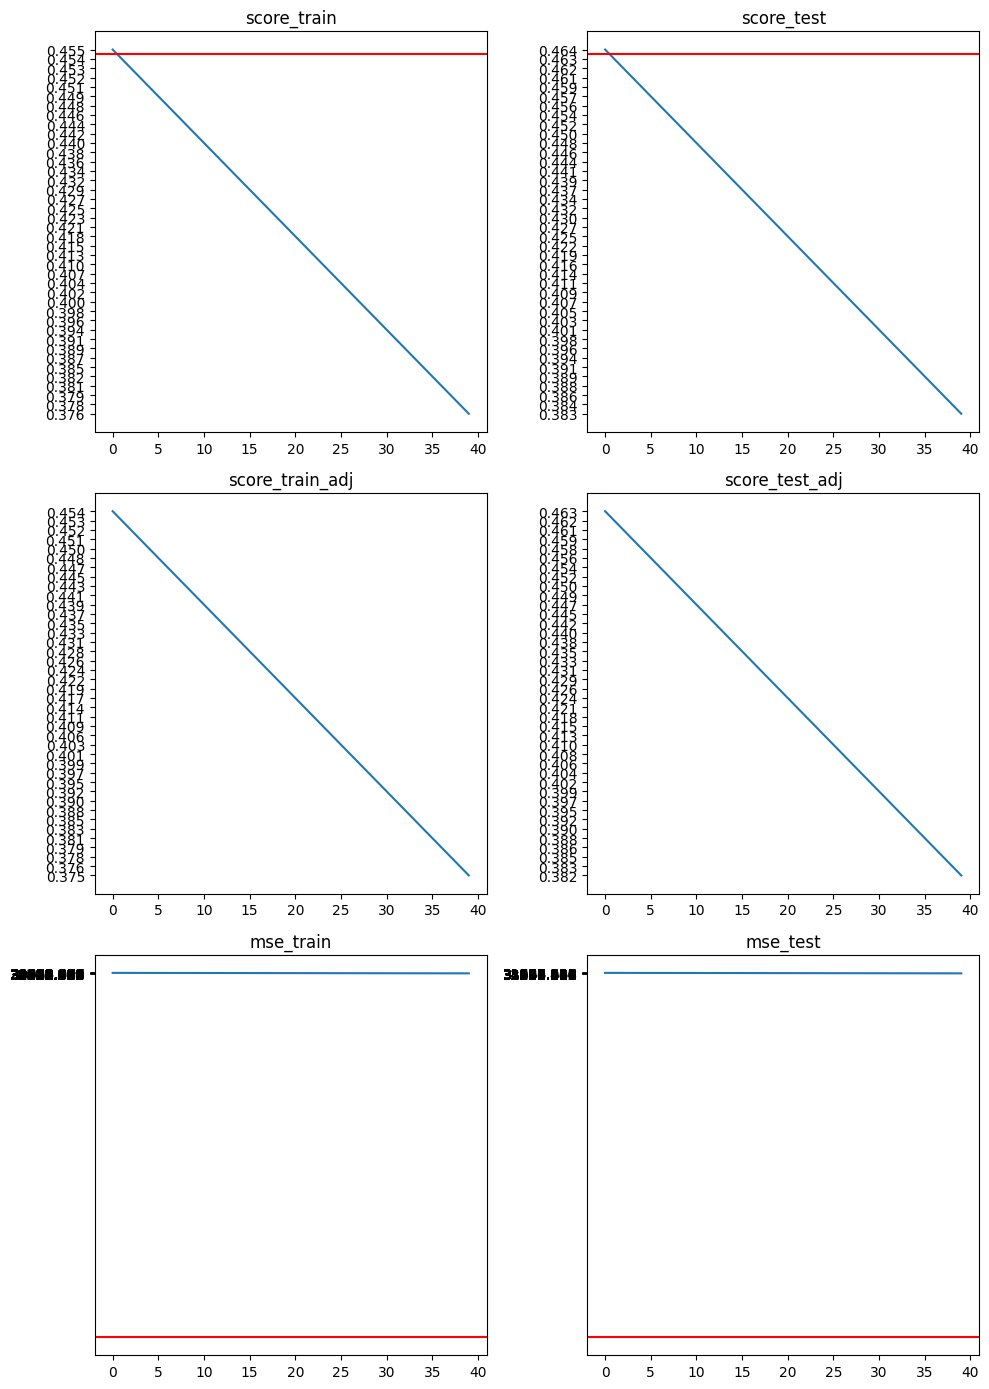

In [30]:
fig, axes = plt.subplots(3,2, figsize = (10,14))

sns.lineplot(scores_train_, ax = axes[0,0]).set(title = 'score_train')
axes[0,0].axhline(lin_reg_score, color = 'red')
sns.lineplot(scores_test_, ax = axes[0,1]).set(title = 'score_test')
axes[0,1].axhline(lin_reg_score, color = 'red')

sns.lineplot(scores_adj_train_, ax = axes[1,0]).set(title = 'score_train_adj')
sns.lineplot(scores_adj_test_, ax = axes[1,1]).set(title = 'score_test_adj')

sns.lineplot(mse_train_, ax = axes[2,0]).set(title = 'mse_train')
axes[2,0].axhline(lin_reg_mse, color = 'red')
sns.lineplot(mse_test_, ax = axes[2,1]).set(title = 'mse_test')
axes[2,1].axhline(lin_reg_mse, color = 'red')

plt.tight_layout()

# outliners?

In [53]:
possibly_non_categorical_columns = [col  for col in df.columns if df[col].unique().shape[0] >= 10 ]

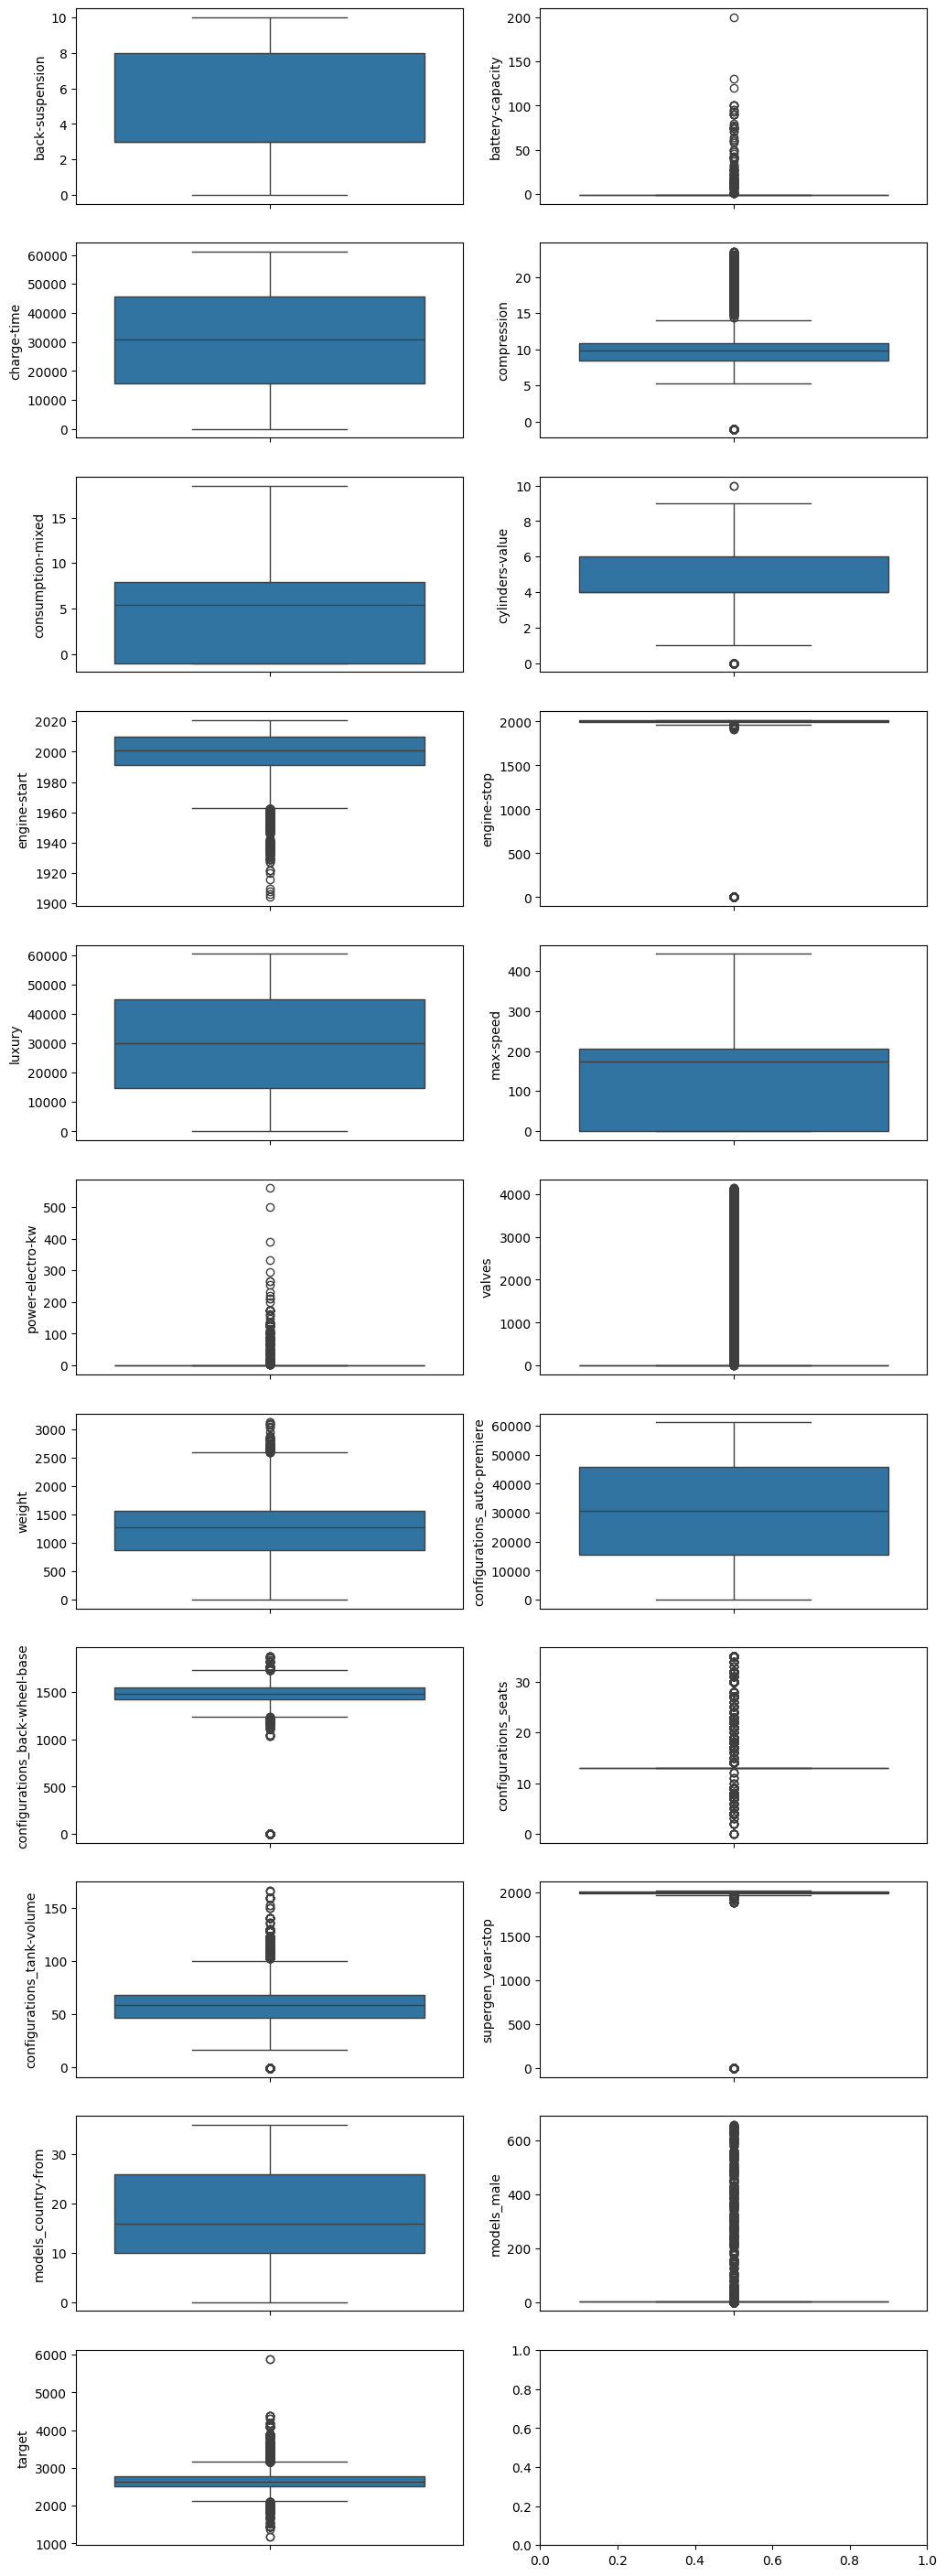

In [87]:
fig, axes = plt.subplots(11, 2, figsize = (12,36))

for col, ax in zip(possibly_non_categorical_columns, axes.ravel()):
    sns.boxplot(df[col], ax = ax)

In [56]:
possible_outliners = ['consumption-mixed','weight', 'configurations_back-wheel-base', 'target']

In [69]:
from scipy import stats as st
for col in possible_outliners:
    df = df[st.zscore(df[col]) <= 3]

In [72]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [74]:
model_lin_reg = LinearRegression().fit(train_X, train_y)
model_lasso = lm.Lasso(alpha = 1).fit(train_X, train_y)
model_ridge = lm.Lasso(alpha = 1).fit(train_X, train_y)

In [75]:
train_score_lin = model_lin_reg.score(train_X, train_y)
train_score_las = model_lasso.score(train_X, train_y)
train_score_rid = model_ridge.score(train_X, train_y)

In [76]:
test_score_lin = model_lin_reg.score(test_X, test_y)
test_score_las = model_lasso.score(test_X, test_y)
test_score_rid = model_ridge.score(test_X, test_y)

In [77]:
print(f'Train scores: linear reg: {train_score_lin}, lasso reg:{train_score_las}, ridge reg: {train_score_rid}')

Train scores: linear reg: 0.45428969943996234, lasso reg:0.452563045938558, ridge reg: 0.452563045938558


In [78]:
print(f'Train scores: linear reg: {test_score_lin}, lasso reg:{test_score_las}, ridge reg: {test_score_rid}')

Train scores: linear reg: 0.4608620941163831, lasso reg:0.45844006341869104, ridge reg: 0.45844006341869104


In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [81]:
tre_reg = DecisionTreeRegressor().fit(train_X, train_y)
for_reg = RandomForestRegressor().fit(train_X, train_y)

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [83]:
tre_reg.score(train_X, train_y), tre_reg.score(test_X, test_y)

(1.0, 0.9133842458537951)

In [84]:
for_reg.score(train_X, train_y), for_reg.score(test_X, test_y)

(0.9923826757386338, 0.9541937660309445)

In [86]:
36/46

0.782608695652174